# Credit EDA Case Study

### Problem Statement - I

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile.

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

1. The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

2. All other cases: All other cases when the payment is paid on time.

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

#disable warning messages
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

### Application data

In [2]:
#Read application data as pandas dataframe
inp0=pd.read_csv("application_data.csv")

In [3]:
#Displays first 5 rows
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
#Print information about columns - dtypes, non-null values 
inp0.info(verbose=True) # verbose => True, prints full summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

## Data Cleaning

<u>Steps Involved</u>
<ol>
    <li>Check data types of the columns</li>
    <li>Handling Missing values</li>
    <li>Drop unusable columns</li>
    <li>Impute missing values</li>
</ol>    


#### 1. Check data types of the columns

In [5]:
dim = inp0.shape
print("Number of rows and columns in the dataframe are {}, {}".format(dim[0], dim[1]))

Number of rows and columns in the dataframe are 307511, 122


In [6]:
#Info of all the columns in the dataset
inp0.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

#### 2. Handling Missing values

In [7]:
#Find missing percentage of values in each column
missing_perc = (inp0.isnull().sum()/len(inp0)*100).reset_index()\
.rename(columns={"index":"Features",0:"Missing%"})\
.sort_values(by="Missing%",ascending=False)
print(missing_perc)

                         Features   Missing%
76                COMMONAREA_MEDI  69.872297
48                 COMMONAREA_AVG  69.872297
62                COMMONAREA_MODE  69.872297
70       NONLIVINGAPARTMENTS_MODE  69.432963
56        NONLIVINGAPARTMENTS_AVG  69.432963
84       NONLIVINGAPARTMENTS_MEDI  69.432963
86             FONDKAPREMONT_MODE  68.386172
68          LIVINGAPARTMENTS_MODE  68.354953
54           LIVINGAPARTMENTS_AVG  68.354953
82          LIVINGAPARTMENTS_MEDI  68.354953
52                  FLOORSMIN_AVG  67.848630
66                 FLOORSMIN_MODE  67.848630
80                 FLOORSMIN_MEDI  67.848630
75               YEARS_BUILD_MEDI  66.497784
61               YEARS_BUILD_MODE  66.497784
47                YEARS_BUILD_AVG  66.497784
21                    OWN_CAR_AGE  65.990810
81                  LANDAREA_MEDI  59.376738
67                  LANDAREA_MODE  59.376738
53                   LANDAREA_AVG  59.376738
73              BASEMENTAREA_MEDI  58.515956
45        

In [8]:
#If the missing value % is more than 50 drop it as it can cloud the analysis. making a list for now
drop_cols = missing_perc[missing_perc["Missing%"]>50]["Features"]
print(len(drop_cols))

41


#### 3. Drop unusable columns

In [9]:
#drop columns from dataframe if % missing is more than 50
inp0.drop(labels=list(drop_cols),axis=1,inplace=True)
print(inp0.shape)

(307511, 81)


In [10]:
#Double check missing % values in columns
missing_perc = (inp0.isnull().sum()/len(inp0)*100).reset_index()\
.rename(columns={"index":"Features",0:"Missing%"})\
.sort_values(by="Missing%",ascending=False)
print(missing_perc)

                        Features   Missing%
43                 FLOORSMAX_AVG  49.760822
45                FLOORSMAX_MODE  49.760822
47                FLOORSMAX_MEDI  49.760822
42   YEARS_BEGINEXPLUATATION_AVG  48.781019
44  YEARS_BEGINEXPLUATATION_MODE  48.781019
46  YEARS_BEGINEXPLUATATION_MEDI  48.781019
48                TOTALAREA_MODE  48.268517
49           EMERGENCYSTATE_MODE  47.398304
27               OCCUPATION_TYPE  31.345545
41                  EXT_SOURCE_3  19.825307
80    AMT_REQ_CREDIT_BUREAU_YEAR  13.501631
75    AMT_REQ_CREDIT_BUREAU_HOUR  13.501631
76     AMT_REQ_CREDIT_BUREAU_DAY  13.501631
77    AMT_REQ_CREDIT_BUREAU_WEEK  13.501631
78     AMT_REQ_CREDIT_BUREAU_MON  13.501631
79     AMT_REQ_CREDIT_BUREAU_QRT  13.501631
11               NAME_TYPE_SUITE   0.420148
51      DEF_30_CNT_SOCIAL_CIRCLE   0.332021
52      OBS_60_CNT_SOCIAL_CIRCLE   0.332021
53      DEF_60_CNT_SOCIAL_CIRCLE   0.332021
50      OBS_30_CNT_SOCIAL_CIRCLE   0.332021
40                  EXT_SOURCE_2

#### 4. Impute missing values

In [11]:
#Check for columns with missing values
null_columns = missing_perc[missing_perc["Missing%"]>0]
null_columns

,Features,Missing%
43,FLOORSMAX_AVG,49.760822
45,FLOORSMAX_MODE,49.760822
47,FLOORSMAX_MEDI,49.760822
42,YEARS_BEGINEXPLUATATION_AVG,48.781019
44,YEARS_BEGINEXPLUATATION_MODE,48.781019
46,YEARS_BEGINEXPLUATATION_MEDI,48.781019
48,TOTALAREA_MODE,48.268517
49,EMERGENCYSTATE_MODE,47.398304
27,OCCUPATION_TYPE,31.345545
41,EXT_SOURCE_3,19.825307


#### Handling missing numerical data types
<ol>
    <li>integer</li>
    <li>float</li>
</ol>    

In [12]:
#list numerical columns with null values
numeric_list = [ c for c in inp0.select_dtypes([np.number]).columns if c in list(null_columns["Features"])]
print(numeric_list)

['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


For Imputing the Missing values in Numerical Dtype columns:

1. Use median when there is a significant outlier in the column data
2. Use mean when there is no significant outlier int he column data

In [13]:
#make a median list of columns with outliers
median_cols = []
for i in numeric_list:
    Q1 = inp0[i].quantile(0.25)
    Q3 = inp0[i].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    if (inp0[i].max() - upper != 0) or (abs(inp0[i].min()) - abs(lower)!= 0):
        median_cols.append(i)

print(median_cols)

['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [14]:
#impute outlier columns with median value
for i in median_cols:
    inp0[i].fillna(inp0[i].median(), inplace = True)

In [15]:
#double check if median column list has no missing values
inp0[median_cols].isnull().sum()/len(inp0)*100

AMT_ANNUITY                     0.0
AMT_GOODS_PRICE                 0.0
CNT_FAM_MEMBERS                 0.0
EXT_SOURCE_2                    0.0
EXT_SOURCE_3                    0.0
YEARS_BEGINEXPLUATATION_AVG     0.0
FLOORSMAX_AVG                   0.0
YEARS_BEGINEXPLUATATION_MODE    0.0
FLOORSMAX_MODE                  0.0
YEARS_BEGINEXPLUATATION_MEDI    0.0
FLOORSMAX_MEDI                  0.0
TOTALAREA_MODE                  0.0
OBS_30_CNT_SOCIAL_CIRCLE        0.0
DEF_30_CNT_SOCIAL_CIRCLE        0.0
OBS_60_CNT_SOCIAL_CIRCLE        0.0
DEF_60_CNT_SOCIAL_CIRCLE        0.0
DAYS_LAST_PHONE_CHANGE          0.0
AMT_REQ_CREDIT_BUREAU_HOUR      0.0
AMT_REQ_CREDIT_BUREAU_DAY       0.0
AMT_REQ_CREDIT_BUREAU_WEEK      0.0
AMT_REQ_CREDIT_BUREAU_MON       0.0
AMT_REQ_CREDIT_BUREAU_QRT       0.0
AMT_REQ_CREDIT_BUREAU_YEAR      0.0
dtype: float64

In [16]:
# Adding all the Columns with outliers in a new list Mean_list
mean_cols = []
for i in numeric_list:
    Q1 = inp0[i].quantile(0.25)
    Q3 = inp0[i].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR
    # print(Q1, Q3, IQR, upper, lower)
    if (inp0[i].max() - upper == 0) or (abs(inp0[i].min()) - abs(lower)== 0):
        mean_cols.append(i)

print(mean_cols)

['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT']


In [17]:
#fill na columns with mean value
for i in mean_cols:
    inp0[i].fillna(inp0[i].mean(), inplace = True)

In [18]:
#double check if the columns doesn't have na values
inp0[mean_cols].isnull().sum()/len(inp0)*100

DEF_30_CNT_SOCIAL_CIRCLE      0.0
DEF_60_CNT_SOCIAL_CIRCLE      0.0
AMT_REQ_CREDIT_BUREAU_HOUR    0.0
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
dtype: float64

In [19]:
#Double check numerical columns doesn't have missing rows
inp0[numeric_list].isnull().sum()/len(inp0)*100

AMT_ANNUITY                     0.0
AMT_GOODS_PRICE                 0.0
CNT_FAM_MEMBERS                 0.0
EXT_SOURCE_2                    0.0
EXT_SOURCE_3                    0.0
YEARS_BEGINEXPLUATATION_AVG     0.0
FLOORSMAX_AVG                   0.0
YEARS_BEGINEXPLUATATION_MODE    0.0
FLOORSMAX_MODE                  0.0
YEARS_BEGINEXPLUATATION_MEDI    0.0
FLOORSMAX_MEDI                  0.0
TOTALAREA_MODE                  0.0
OBS_30_CNT_SOCIAL_CIRCLE        0.0
DEF_30_CNT_SOCIAL_CIRCLE        0.0
OBS_60_CNT_SOCIAL_CIRCLE        0.0
DEF_60_CNT_SOCIAL_CIRCLE        0.0
DAYS_LAST_PHONE_CHANGE          0.0
AMT_REQ_CREDIT_BUREAU_HOUR      0.0
AMT_REQ_CREDIT_BUREAU_DAY       0.0
AMT_REQ_CREDIT_BUREAU_WEEK      0.0
AMT_REQ_CREDIT_BUREAU_MON       0.0
AMT_REQ_CREDIT_BUREAU_QRT       0.0
AMT_REQ_CREDIT_BUREAU_YEAR      0.0
dtype: float64

### Impute missing values with mode for categorical data type columns

In [20]:
#list categorical type data 
category_list = [ c for c in inp0.select_dtypes([object]).columns if c in list(null_columns["Features"])]
print(category_list)

['NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'EMERGENCYSTATE_MODE']


##### NAME_TYPE_SUITE

In [21]:
#get count of occurences of each category
inp0.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [22]:
#check count of missing values
inp0.NAME_TYPE_SUITE.isnull().sum()

1292

In [23]:
#fill na with `Unaccompanied` category as it is the mode
inp0.NAME_TYPE_SUITE.fillna(inp0.NAME_TYPE_SUITE.mode()[0], inplace=True)

In [24]:
#double check if mode if filled properly
inp0.NAME_TYPE_SUITE.value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

#### OCCUPATION_TYPE

In [25]:
#get count of occurences of each category
inp0.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [26]:
#check count of missing values
inp0.OCCUPATION_TYPE.isnull().sum()

96391

Since, the number of missing values (96391) is more than the mode we can't use it. Instead mark it Unknown

In [27]:
#fill na as `Unknown` category
inp0.OCCUPATION_TYPE.fillna("Unknown", inplace=True)

In [28]:
#double check if Unknown category if filled properly
inp0.OCCUPATION_TYPE.value_counts()

Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

#### EMERGENCYSTATE_MODE

In [29]:
#get count of occurences of each category
inp0.EMERGENCYSTATE_MODE.value_counts()

No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

In [30]:
#check count of missing values
inp0.EMERGENCYSTATE_MODE.isnull().sum()

145755

In [31]:
# % of missing values wrt to mode
145755/159428 *100

91.42371478033972

Drop the column as the na values are more than 91%

In [32]:
#drop EMERGENCYSTATE_MODE column from dataframe
inp0.drop(['EMERGENCYSTATE_MODE'], axis = 1, inplace=True)

In [33]:
#Check one last time for % missing values if the process went right

missing_perc = (inp0.isnull().sum()/len(inp0)*100).reset_index()\
.rename(columns={"index":"Features",0:"Missing%"})\
.sort_values(by="Missing%",ascending=False)
print(missing_perc)

                        Features  Missing%
0                     SK_ID_CURR       0.0
1                         TARGET       0.0
58               FLAG_DOCUMENT_6       0.0
57               FLAG_DOCUMENT_5       0.0
56               FLAG_DOCUMENT_4       0.0
55               FLAG_DOCUMENT_3       0.0
54               FLAG_DOCUMENT_2       0.0
53        DAYS_LAST_PHONE_CHANGE       0.0
52      DEF_60_CNT_SOCIAL_CIRCLE       0.0
51      OBS_60_CNT_SOCIAL_CIRCLE       0.0
50      DEF_30_CNT_SOCIAL_CIRCLE       0.0
49      OBS_30_CNT_SOCIAL_CIRCLE       0.0
48                TOTALAREA_MODE       0.0
47                FLOORSMAX_MEDI       0.0
46  YEARS_BEGINEXPLUATATION_MEDI       0.0
45                FLOORSMAX_MODE       0.0
44  YEARS_BEGINEXPLUATATION_MODE       0.0
43                 FLOORSMAX_AVG       0.0
42   YEARS_BEGINEXPLUATATION_AVG       0.0
59               FLAG_DOCUMENT_7       0.0
60               FLAG_DOCUMENT_8       0.0
61               FLAG_DOCUMENT_9       0.0
71         

In [34]:
#Replacing XNA and XAP values with NAN
inp0.replace('XNA',np.NaN, inplace=True)
inp0.replace('XAP',np.NaN, inplace=True)

### Bucketing

In [35]:
# Creating buckets for income amount
slots = ['0-25000', '25000-50000','50000-75000','75000-100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']
buckets = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]


inp0['AMT_INCOME_RANGE']=pd.cut(inp0['AMT_INCOME_TOTAL'],buckets,labels=slots)

In [36]:
# Creating buckets for Credit amount
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']
buckets = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]

inp0['AMT_CREDIT_RANGE']=pd.cut(inp0['AMT_CREDIT'],bins=buckets,labels=slots)

In [37]:
# Dividing the dataset into two datasets
#target=1(client with payment difficulties) and target=0(all other)
t1 = inp0.loc[inp0["TARGET"]==1]
t0 = inp0.loc[inp0["TARGET"]==0]

#### Data imbalance %

In [38]:
#calculating data imbalance percentage
data_imbalance = len(t0)/len(t1)
print(data_imbalance)

11.387150050352467


## Data analysis
#### <i>Univariate analysis on categories</i> 

In [39]:
#reusable function to plot custom count plots
def plot_method(data, col, title, hue = None):
    
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['axes.titlepad'] = 15
    plt.rcParams["axes.labelsize"] = 10
    
    sns.set_style('whitegrid')
    sns.set_context('poster')
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    
    #adjusting width wrt to unique hue and column values
    width = len(data[col].unique()) + 10 + 5*len(temp.unique())
    fig.set_size_inches(width , 8)
    axis = sns.countplot(data=data, x=col, hue=hue, palette='bright') 

    plt.setp(axis.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")   
    plt.title(title, fontsize=12)
    plt.yscale('log')

    plt.show()

<h4>Analysis</h4> 
<br>
<i>AMT_INCOME_RANGE & CODE_GENDER</i>

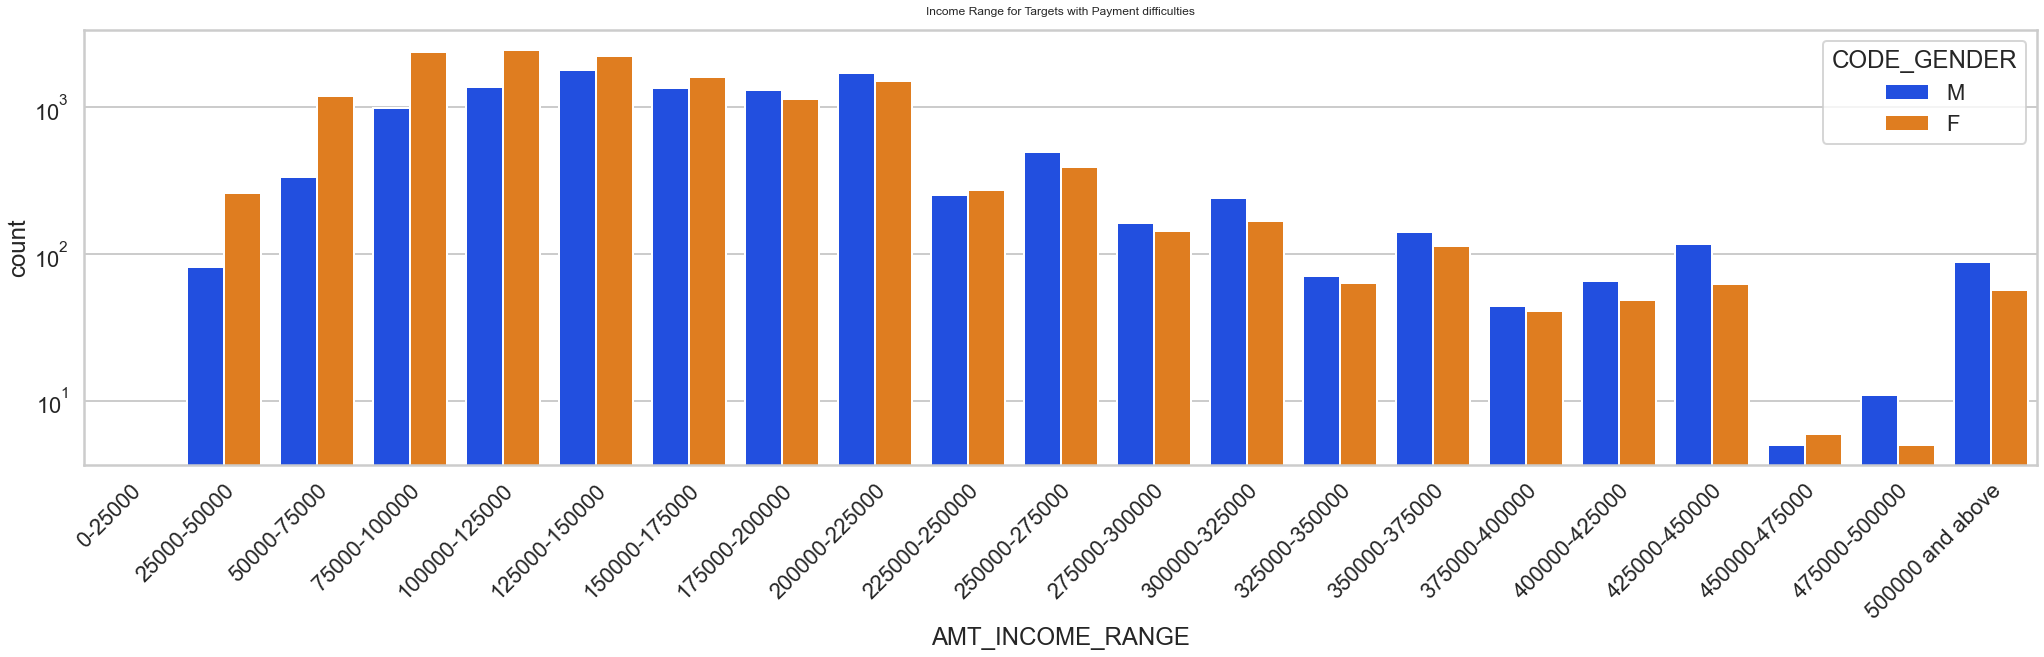

In [40]:
plot_method(t1, col='AMT_INCOME_RANGE',title='Income Range for Targets with Payment difficulties', hue='CODE_GENDER')

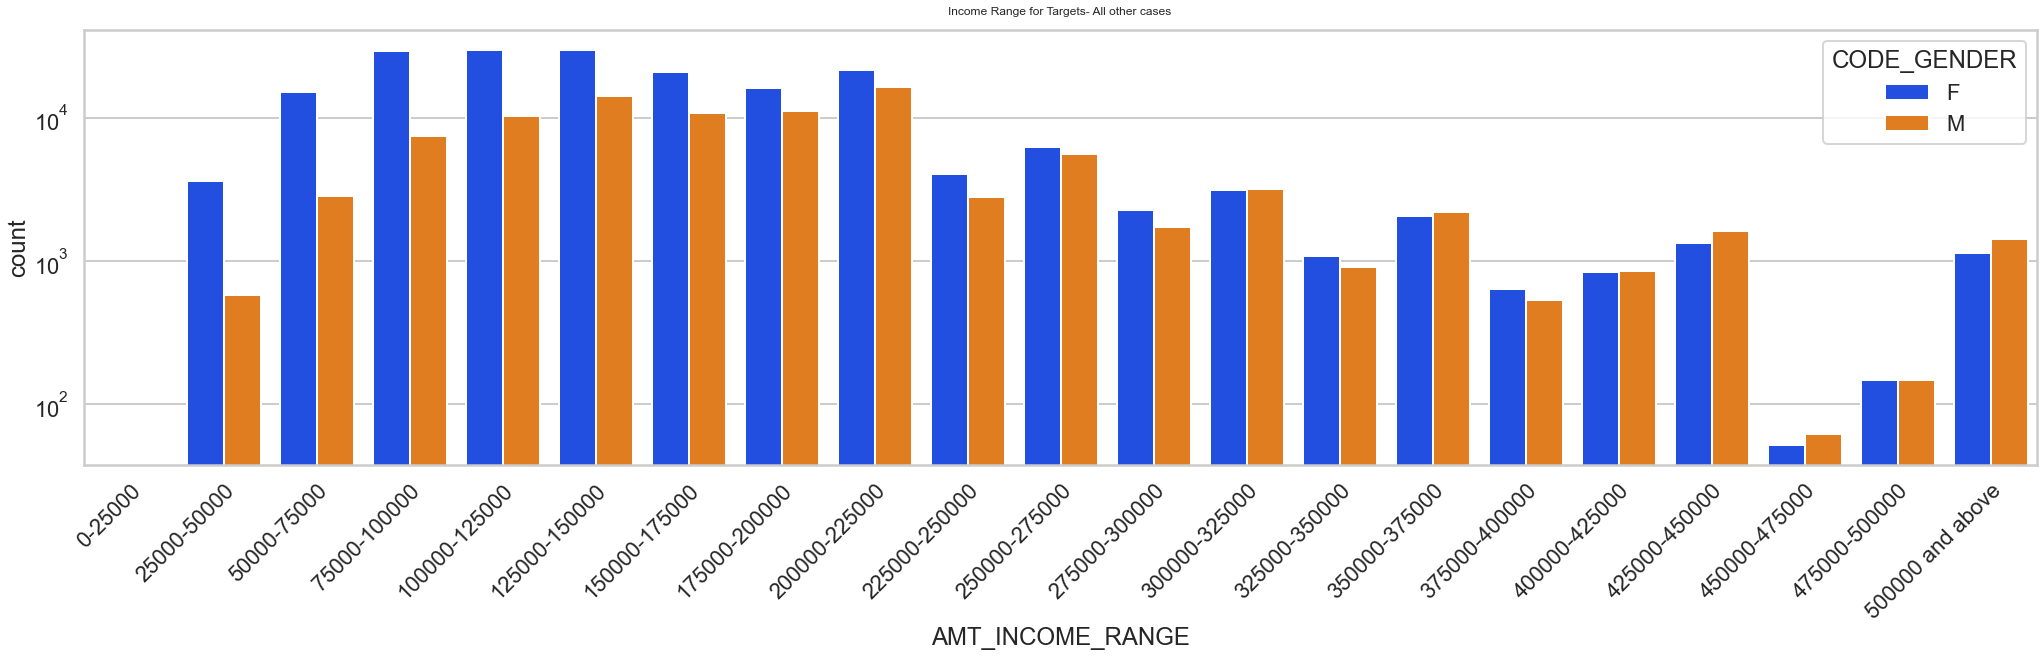

In [41]:
plot_method(t0,col='AMT_INCOME_RANGE',title='Income Range for Targets- All other cases ',hue='CODE_GENDER')

#### Observation:

From the above graph for Target=1 (Defaulters) the following points can be concluded.
1. The income range of males were more compared to females at ranges 500000 and above .
2. This graph show that males are more than female in having income ranges between 175000 and 225000.

From the above graph for Target=0 (Non-Defaulters) the following points can be concluded.
1. The income range of female counts are higher than male at ranges 25000 and 200000
2. This graph show that females are more than male in having income ranges for that range.

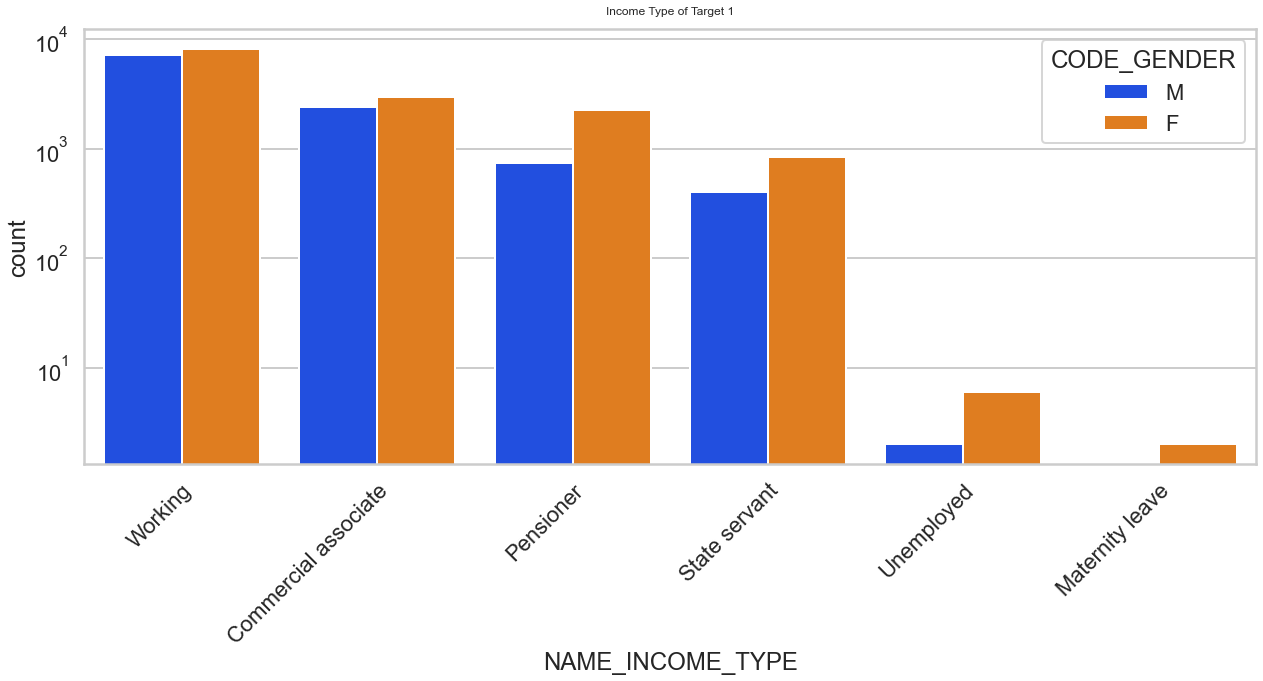

In [42]:
plot_method(t1,col='NAME_INCOME_TYPE',title='Income Type of Target 1',hue='CODE_GENDER')

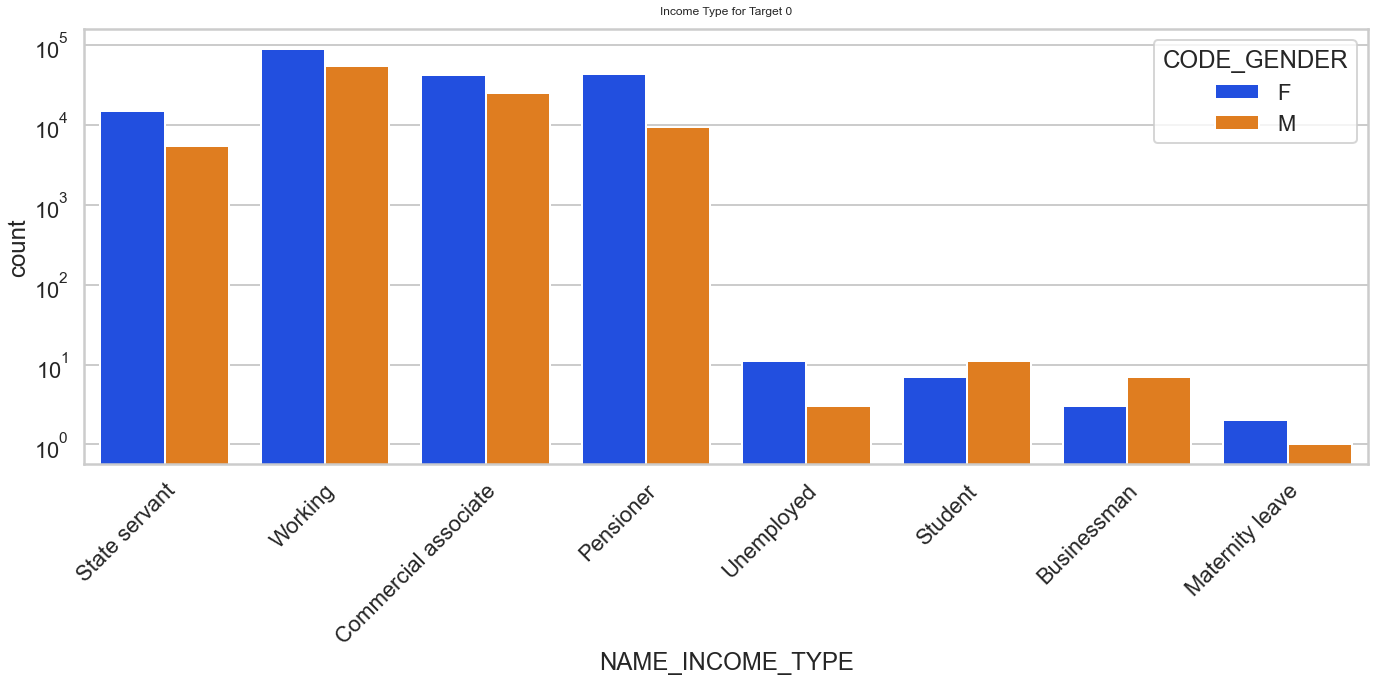

In [43]:
plot_method(t0,col='NAME_INCOME_TYPE',title='Income Type for Target 0',hue='CODE_GENDER')

#### Observation:

From the above graph for Target=1 (Defaulters) the following points can be concluded.
1. Income type working, commercial associate, pensioner and state servant defaulted more compared to unemployed.
2. Unemployed has lesser credit compared to other categories.

From the above graph for Target=0 (Non-Defaulters) the following points can be concluded.
1. Females defaulted less compared to males.  
2. Students and Businessman never defaulted based on the above data.


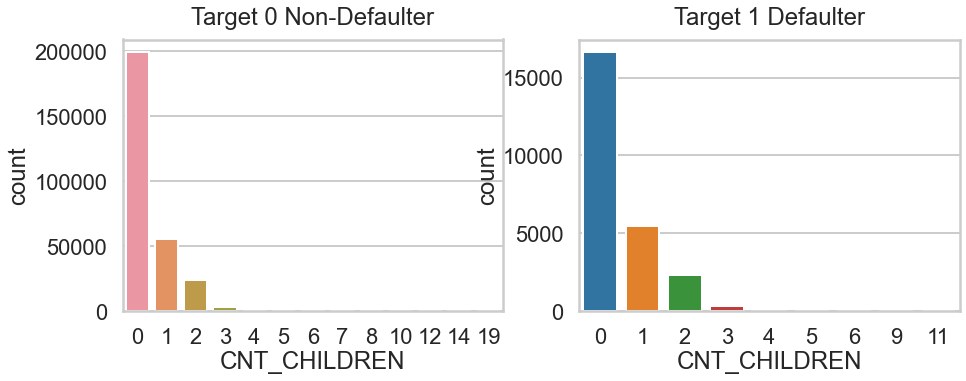

In [44]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
sns.countplot(t1['CNT_CHILDREN'], ax=ax[1]).set_title('Target 1 Defaulter')
sns.countplot(t0['CNT_CHILDREN'], ax=ax[0]).set_title('Target 0 Non-Defaulter')

fig.show()

#### Observation
From the above graph the following points can be concluded.
1. Both the graph pretty much looks the same. So, children count doesn't determine the chances of being a defaulter or a non-defaulter.


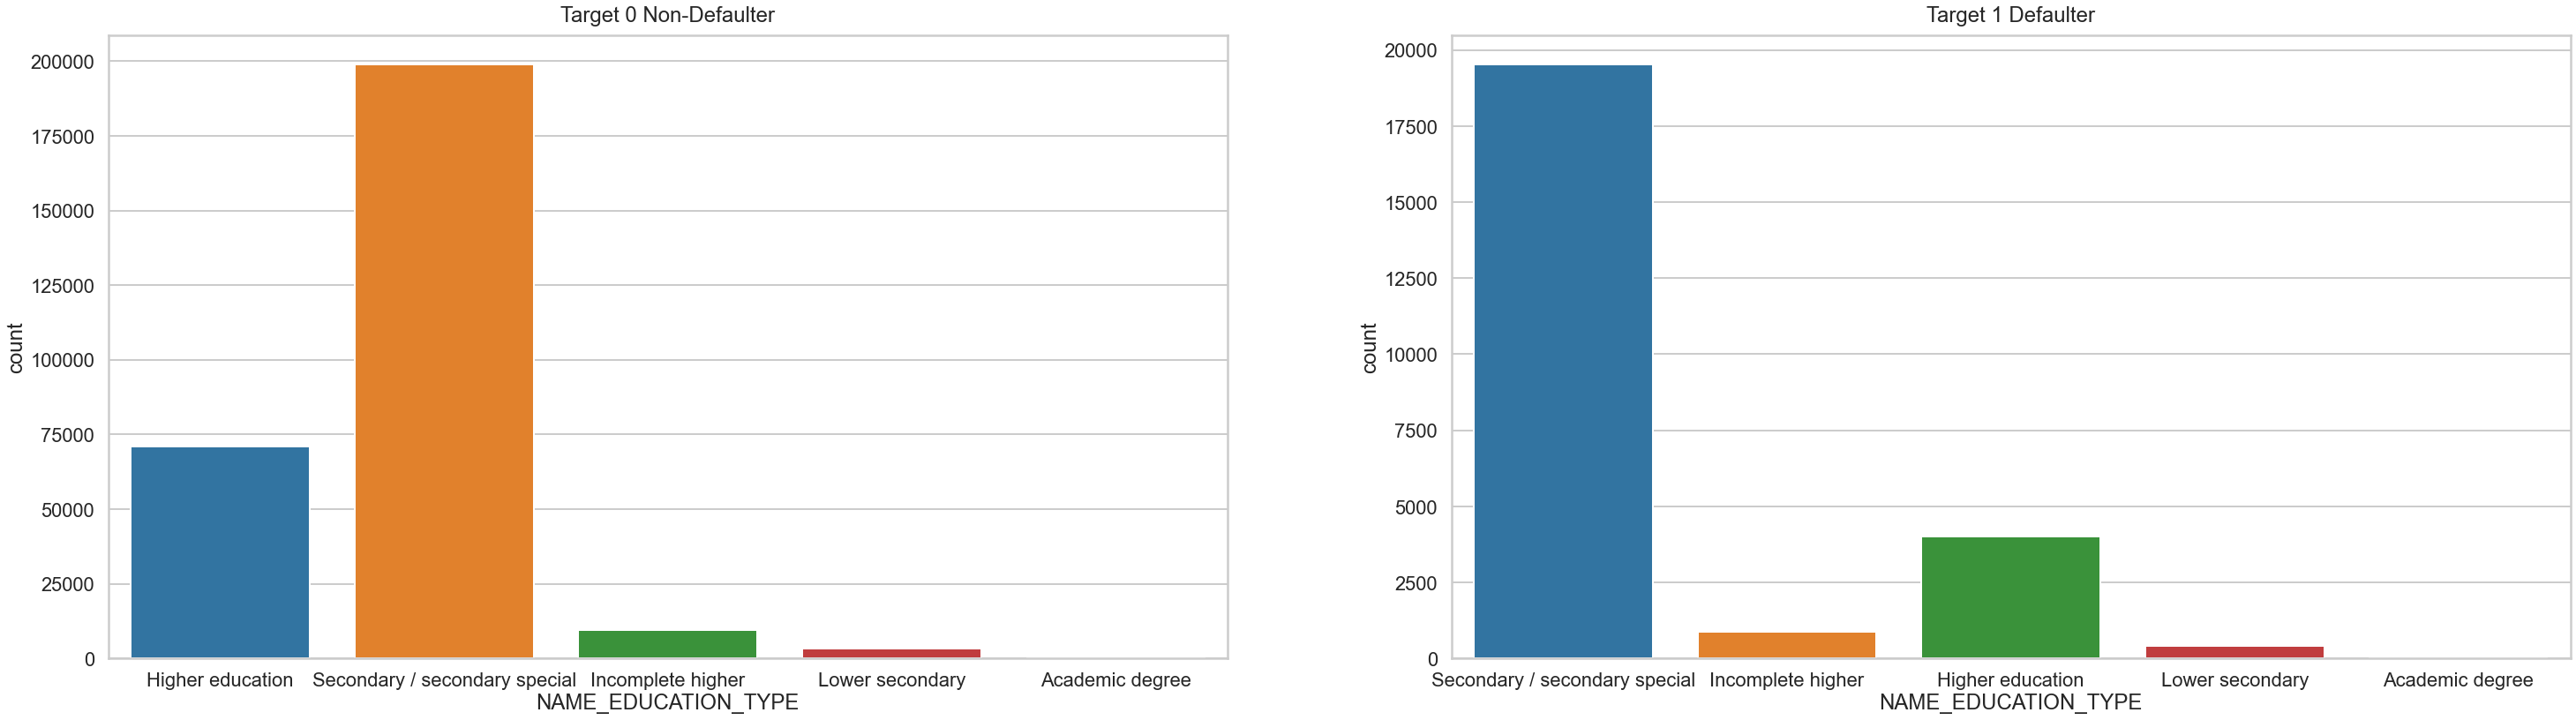

In [45]:
fig, ax=plt.subplots(1,2,figsize=(50,13))
sns.countplot(t1['NAME_EDUCATION_TYPE'], ax=ax[1]).set_title('Target 1 Defaulter')
sns.countplot(t0['NAME_EDUCATION_TYPE'], ax=ax[0]).set_title('Target 0 Non-Defaulter')

fig.show()

#### Observation
From the above graph the following points can be concluded.
1. People with Secondary education defaulted the most

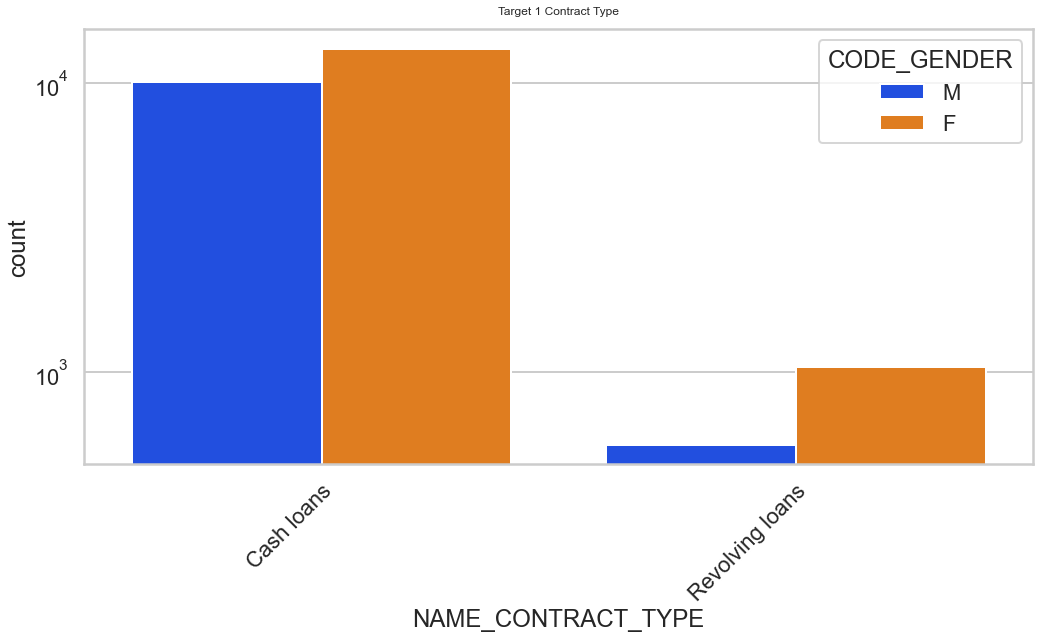

In [46]:
#Plotting for NAME_CONTRACT_TYPE for defaulters
plot_method(t1,col='NAME_CONTRACT_TYPE',title='Target 1 Contract Type',hue='CODE_GENDER')


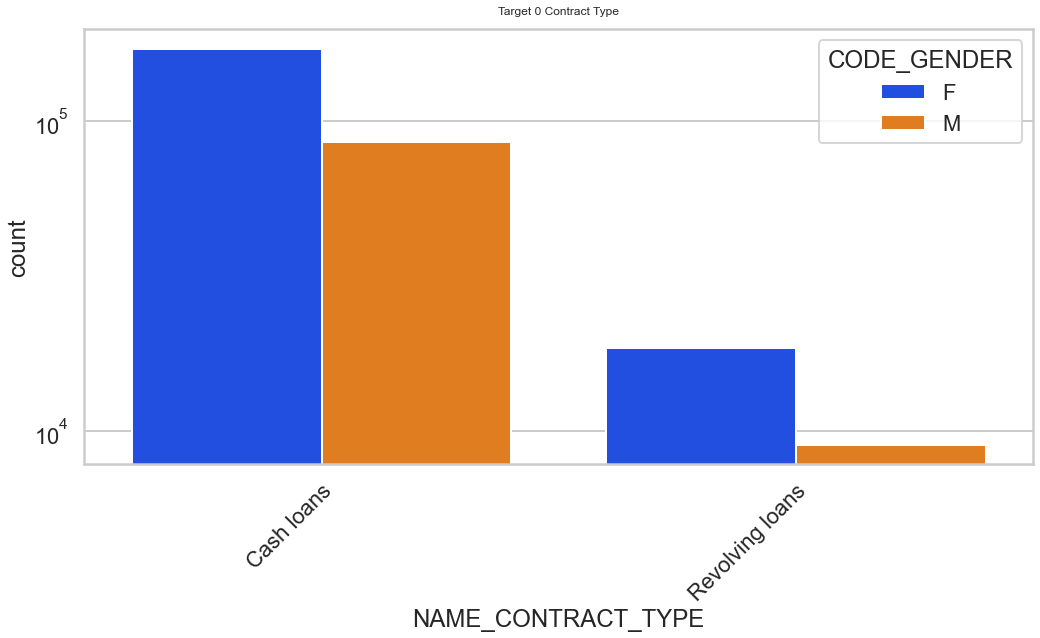

In [47]:
#Plotting for NAME_CONTRACT_TYPE for non-defaulters
plot_method(t0,col='NAME_CONTRACT_TYPE',title='Target 0 Contract Type',hue='CODE_GENDER')

#### Observation:

From the above graph for Target=1 (Defaulters) the following points can be concluded.
1. Individuals getting Cash loans defaulted the most than Revolving loans.
2. Female revolving loans were more compared to males.

From the above graph for Target=0 (Non-Defaulters) the following points can be concluded.
1. Females defaulted less both on Cash loans and Revolving loans
2. Revolving loans were availed the least on both the scenarios


## Continous univariate analysis

#### Define reusable plot functions

In [48]:
# Pie and Bar plotinng funciton
def pie_count(data, column):
    sns.set(style='whitegrid')
    plt.figure(figsize=(10,7), dpi= 80)
    
    plt.subplot(2, 1, 1)
    data[column].value_counts().dropna().plot.pie(autopct = "%1.0f%%")
    plt.title(f"Pie Chart of {column}")
    plt.ylabel("")
    
    ax=plt.subplot(2,1,2)
    data[column].value_counts().plot.bar(width = 0.4)
    plt.title(f"Bar Chart of {column}")
    
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format((p.get_height()/len(inp0))*100), (p.get_x()+0.2, p.get_height()+100), ha='center')
    
    plt.legend()
    plt.show()

In [49]:
# countplot function
def countplot(data,column):
    plt.figure(figsize=[20,7])
    ax=data[column].value_counts().plot.bar(width = 0.5)
    plt.title(f"{column} Distribution ",fontdict={'fontsize':20})

    for p in ax.patches:
        ax.annotate('{:.1f}%'.format((p.get_height()/len(inp0))*100), (p.get_x()+0.2, p.get_height()+100), ha='center')

    plt.legend()
    plt.show()

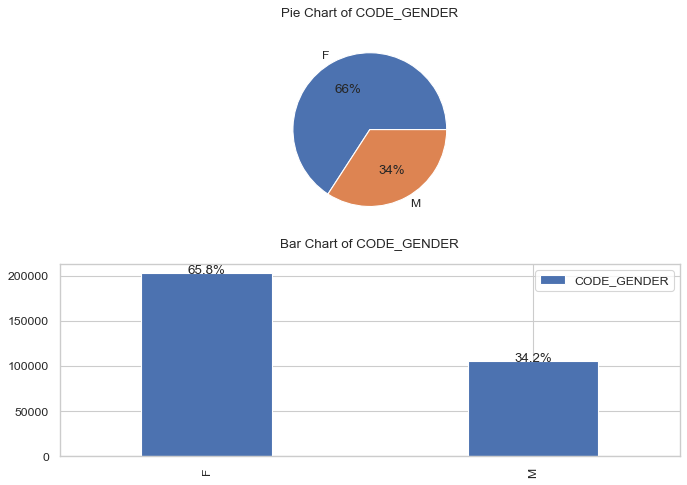

In [50]:
pie_count(inp0,'CODE_GENDER')

#### Overview:
1. Female applicants are more compared to the male applicants.

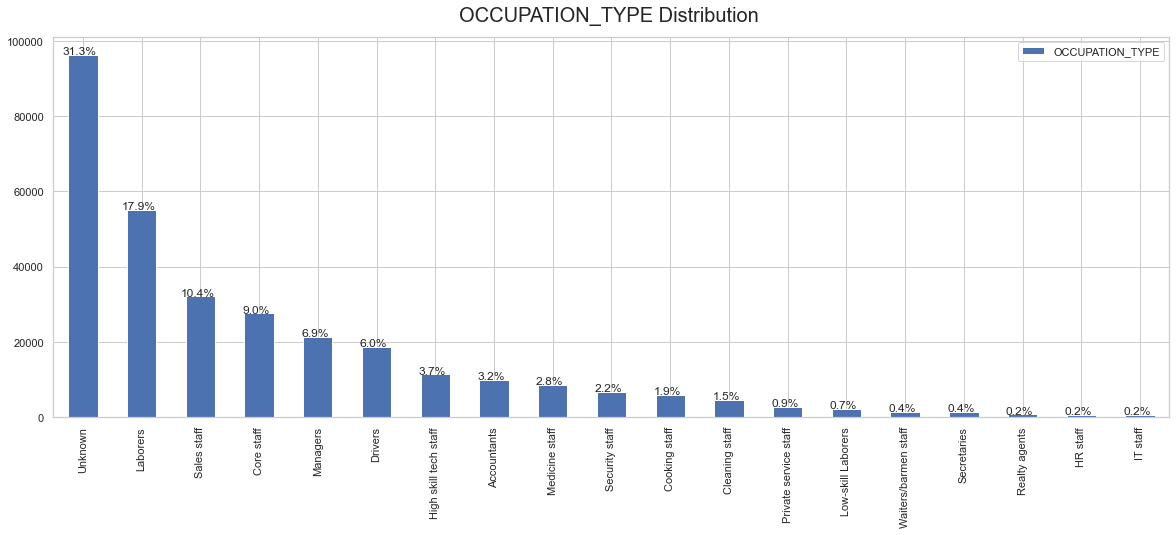

In [51]:
countplot(inp0,'OCCUPATION_TYPE')

#### <u>Overview</u>:
1. Most of the values in Occupation type were missing and imputed with unknown.
2. Labourers applied the most and after that Sales staff, core staff and managers preceded after them.


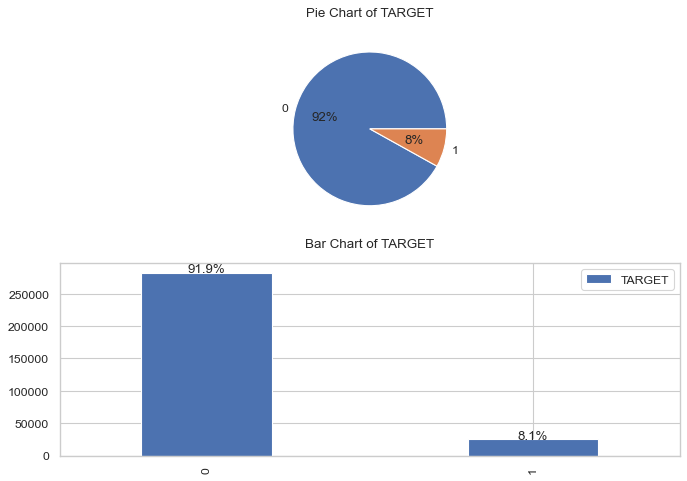

In [52]:
pie_count(inp0,'TARGET')

####  <u>Overview</u>:
1. Proportion of people with payment difficulties are quite less.

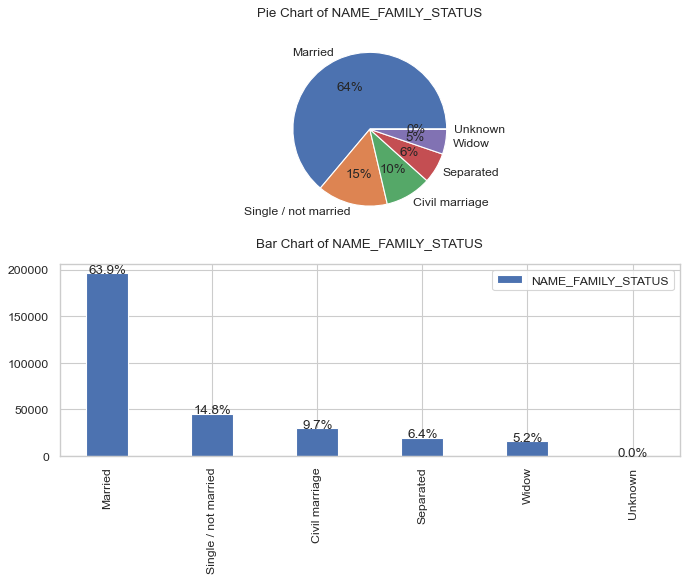

In [53]:
pie_count(inp0,'NAME_FAMILY_STATUS')

#### <u>Overview</u>:
1. Married applicants were most followed by Single/not married

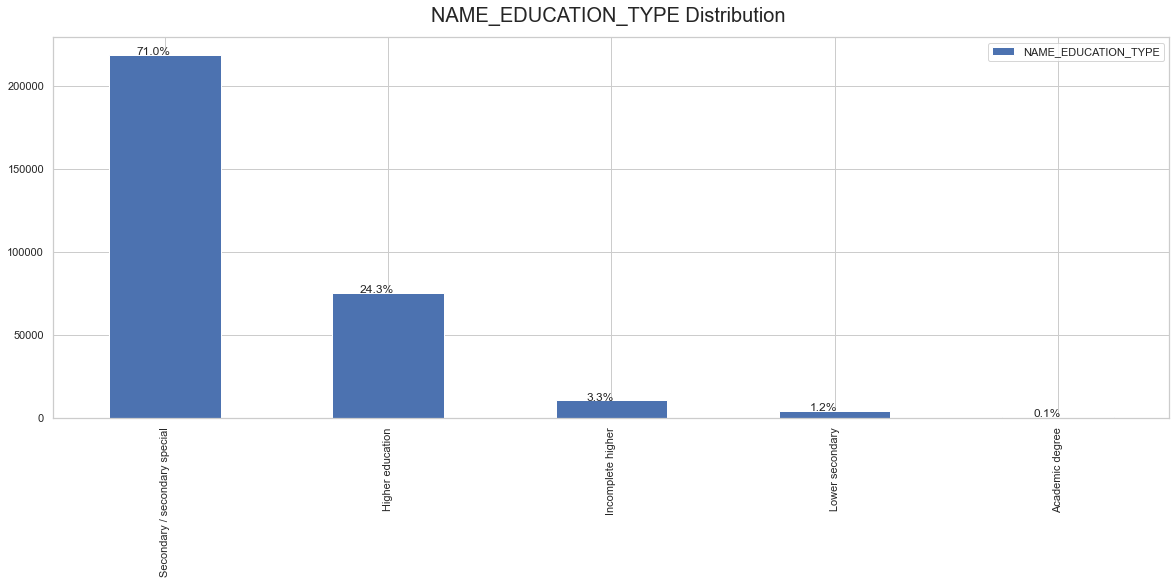

In [54]:
countplot(inp0,'NAME_EDUCATION_TYPE')

#### <u>Overview</u>:
1. Most of the loan applications was for Secondary and Higher education.

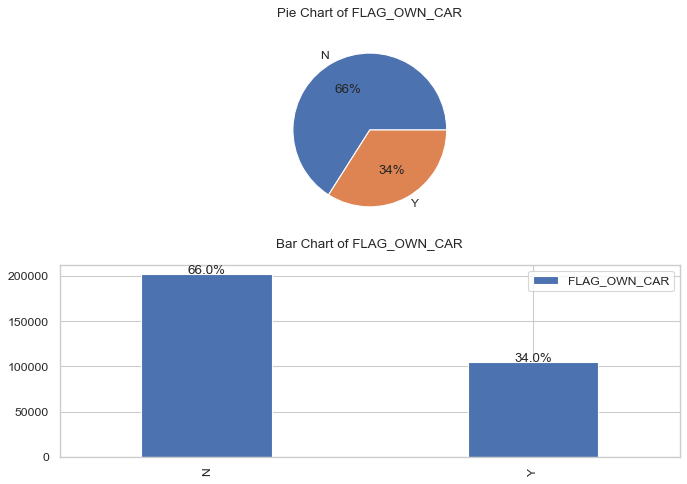

In [55]:
pie_count(inp0,'FLAG_OWN_CAR')

#### <u>Overview</u>:
1. Applicants who doesn't own a car applied the most

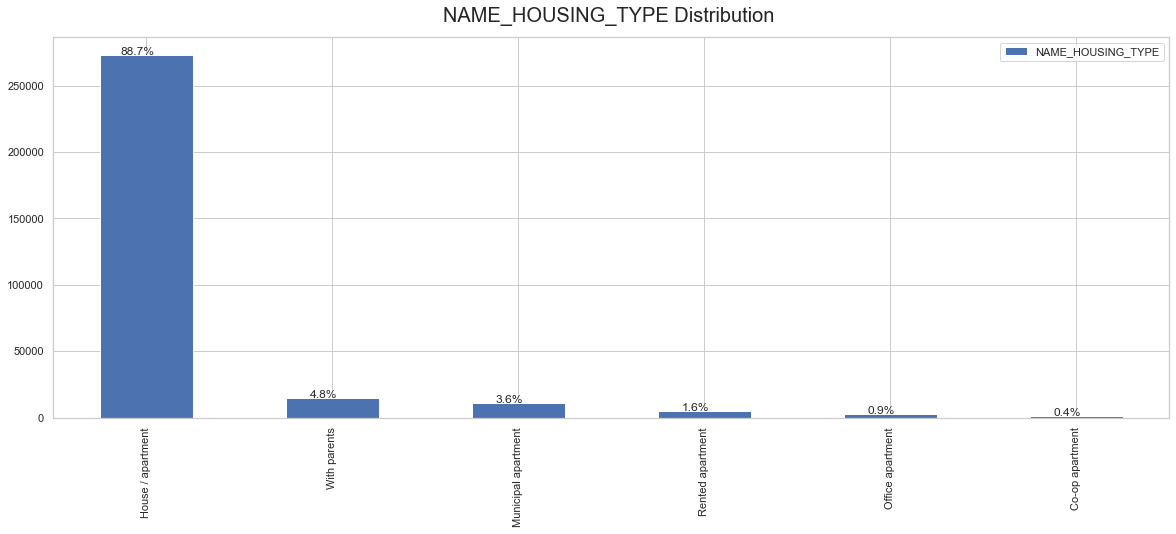

In [56]:
countplot(inp0,'NAME_HOUSING_TYPE')

#### <u>Overview</u>:
1. Individuals who owned a House/apartment applied for loan the most.

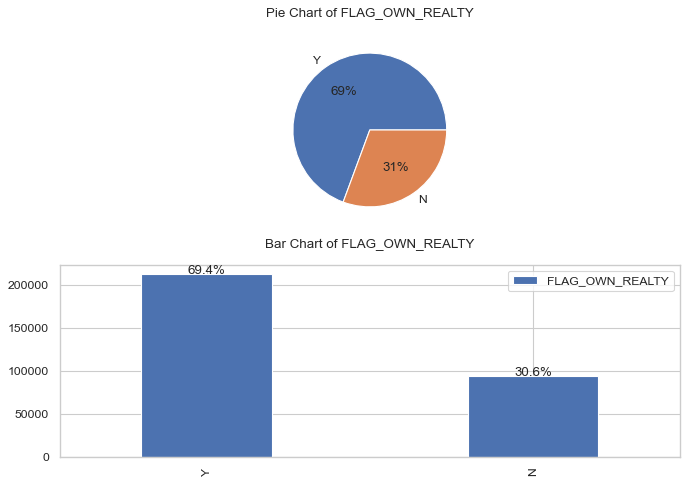

In [57]:
pie_count(inp0,'FLAG_OWN_REALTY')

#### <u>Overview</u>:
1. Individuals who owned a House or flat applied for loan the most.

### Bivariate Analysis

#### Analysing correlation for numerical columns for both Target 0 and Target1

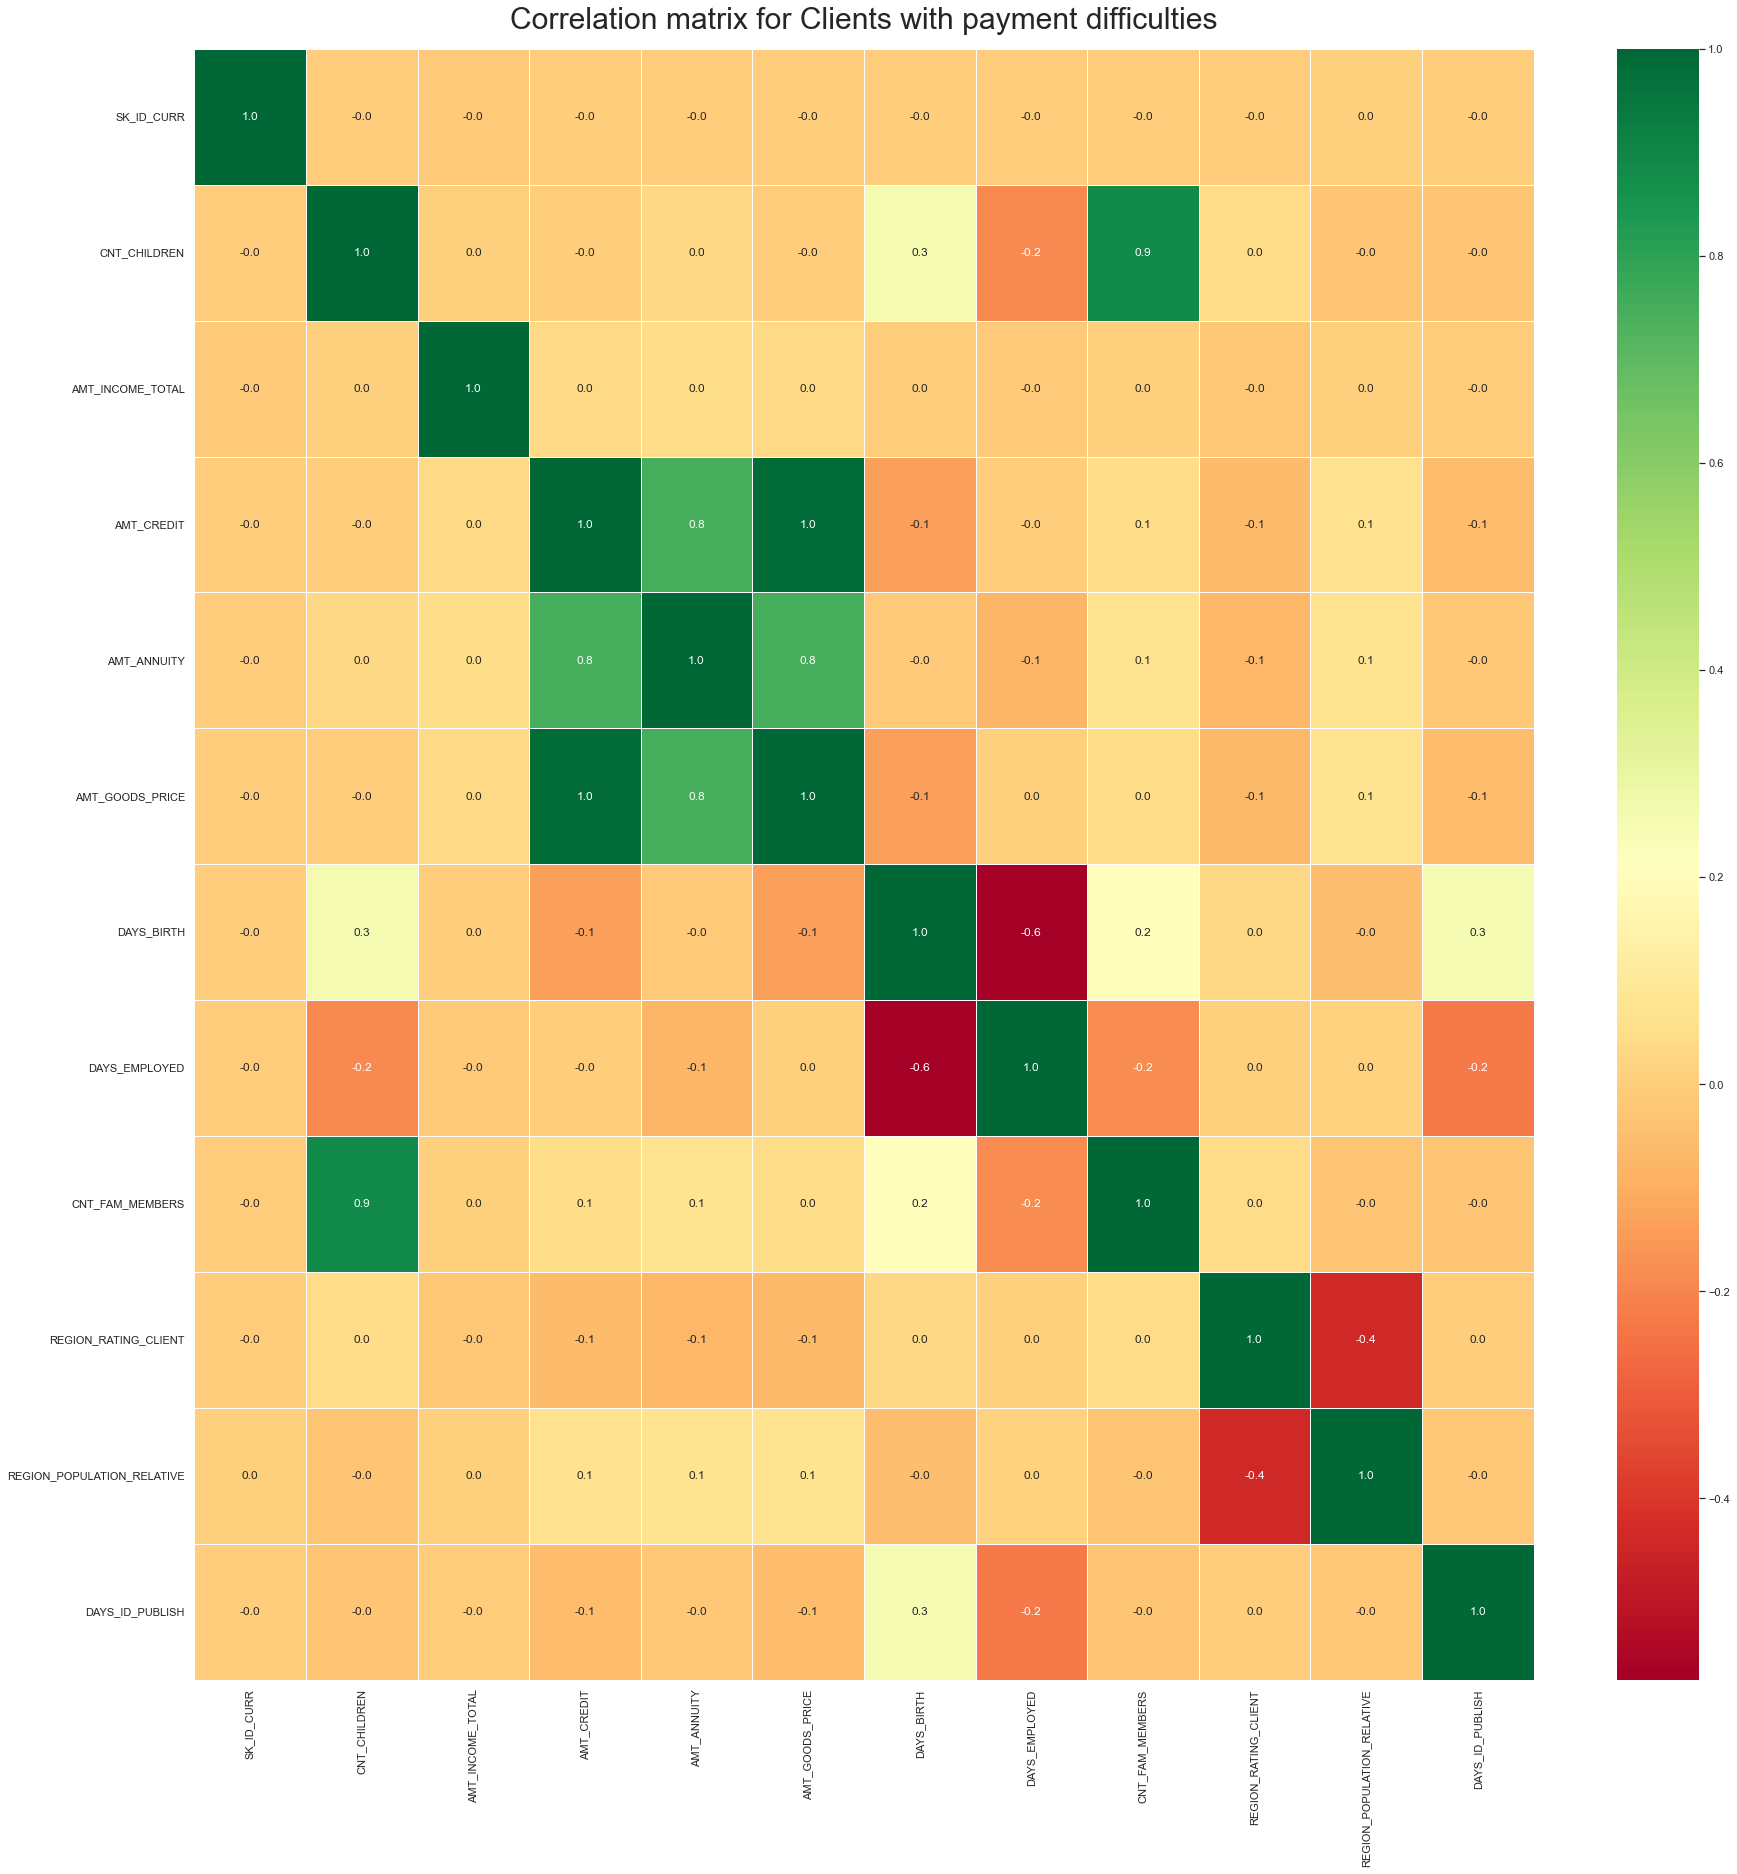

In [58]:
#Plotting Correlation matrix for Target 1 application data
d=t1[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                               'AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
                              'REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH']]
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(d.corr(), annot=True, fmt='.1f',cmap="RdYlGn", linewidths=.5, ax=ax)
plt.title("Correlation matrix for Clients with payment difficulties",fontsize=30, pad=20 )
plt.show()

In [59]:
Corr = t1.corr().abs()
Corr1 = Corr.unstack().sort_values(ascending = False)

print(Corr1.head(200))

SK_ID_CURR                    SK_ID_CURR                      1.000000
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MEDI    1.000000
FLOORSMAX_AVG                 FLOORSMAX_AVG                   1.000000
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_AVG     1.000000
EXT_SOURCE_3                  EXT_SOURCE_3                    1.000000
EXT_SOURCE_2                  EXT_SOURCE_2                    1.000000
LIVE_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY         1.000000
REG_CITY_NOT_WORK_CITY        REG_CITY_NOT_WORK_CITY          1.000000
REG_CITY_NOT_LIVE_CITY        REG_CITY_NOT_LIVE_CITY          1.000000
LIVE_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION     1.000000
REG_REGION_NOT_WORK_REGION    REG_REGION_NOT_WORK_REGION      1.000000
REG_REGION_NOT_LIVE_REGION    REG_REGION_NOT_LIVE_REGION      1.000000
HOUR_APPR_PROCESS_START       HOUR_APPR_PROCESS_START         1.000000
REGION_RATING_CLIENT_W_CITY   REGION_RATING_CLIENT_W_CITY     1.000000
REGION

#### Top 10 correlations for relevant columns - Payment Difficulties

Column 1|Column 2|Correlation|
--------|--------|-----------|
AMT_GOODS_PRICE|AMT_CREDIT|0.982783|
CNT_CHILDREN|CNT_FAM_MEMBERS|0.885484|
AMT_GOODS_PRICE|AMT_ANNUITY|0.752295|
AMT_CREDIT|AMT_ANNUITY|0.752195|
DAYS_BIRTH|DAYS_EMPLOYED|0.575097|
REGION_POPULATION_RELATIVE|REGION_RATING_CLIENT_W_CITY|0.446977|
REGION_RATING_CLIENT|REGION_POPULATION_RELATIVE|0.443236|
CNT_CHILDREN|DAYS_BIRTH|0.259109|
EXT_SOURCE_2|REGION_RATING_CLIENT|0.250335|
EXT_SOURCE_2|REGION_RATING_CLIENT_W_CITY|0.248619|

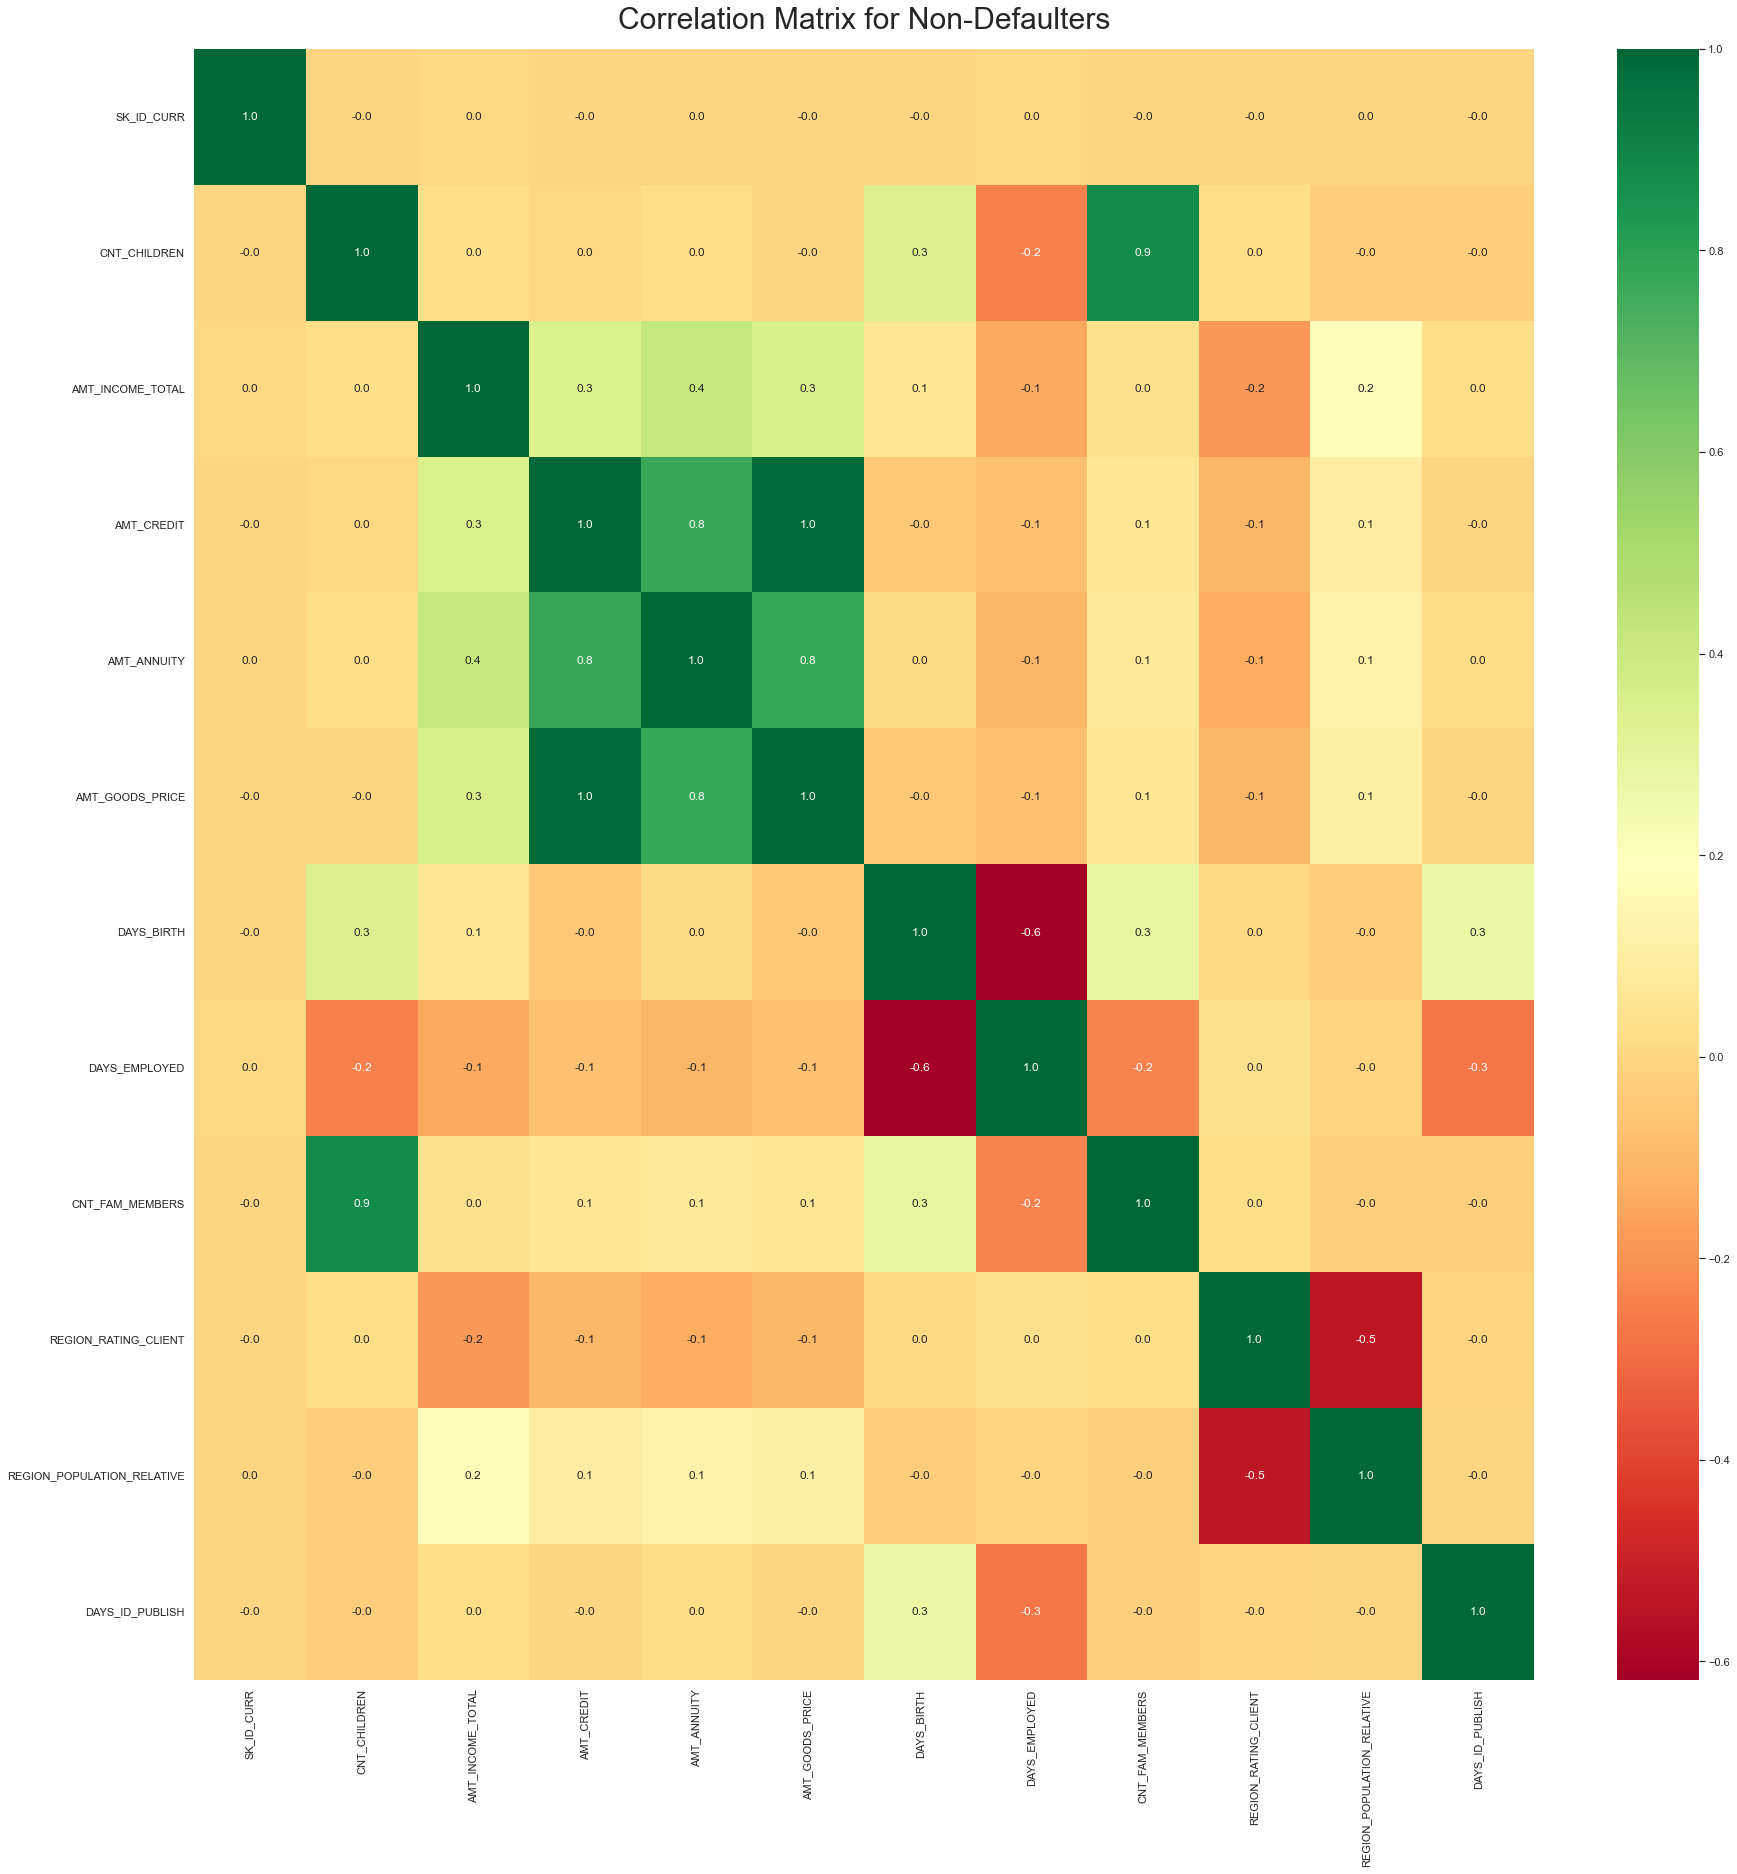

In [60]:
#Plotting Correlation matrix for non-defaulters application data
d=t0[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                               'AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
                              'REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH']]

plt.figure(figsize=(30,30))
sns.heatmap(d.corr(), fmt='.1f', cmap="RdYlGn", annot=True)
plt.title("Correlation Matrix for Non-Defaulters",fontsize=30, pad=20 )
plt.show()

In [61]:
Corr = t0.corr().abs()
Corr1 = Corr.unstack().sort_values(ascending = False)

print(Corr1.head(200))

SK_ID_CURR                    SK_ID_CURR                      1.000000
FLOORSMAX_MEDI                FLOORSMAX_MEDI                  1.000000
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MODE    1.000000
FLOORSMAX_AVG                 FLOORSMAX_AVG                   1.000000
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_AVG     1.000000
EXT_SOURCE_3                  EXT_SOURCE_3                    1.000000
EXT_SOURCE_2                  EXT_SOURCE_2                    1.000000
LIVE_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY         1.000000
REG_CITY_NOT_WORK_CITY        REG_CITY_NOT_WORK_CITY          1.000000
REG_CITY_NOT_LIVE_CITY        REG_CITY_NOT_LIVE_CITY          1.000000
LIVE_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION     1.000000
REG_REGION_NOT_WORK_REGION    REG_REGION_NOT_WORK_REGION      1.000000
REG_REGION_NOT_LIVE_REGION    REG_REGION_NOT_LIVE_REGION      1.000000
HOUR_APPR_PROCESS_START       HOUR_APPR_PROCESS_START         1.000000
REGION

### Top 10 Correlation for relevent columns - Non-defaulters

Column 1|Column 2|Correlation|
--------|--------|-----------|
AMT_GOODS_PRICE|AMT_CREDIT|0.987022
REGION_RATING_CLIENT_W_CITY|REGION_RATING_CLIENT|0.950149
CNT_FAM_MEMBERS|CNT_CHILDREN|0.878571
AMT_ANNUITY|AMT_GOODS_PRICE|0.776421
AMT_CREDIT|AMT_ANNUITY|0.771297
AMT_GOODS_PRICE|AMT_INCOME_TOTAL|0.349426
AMT_INCOME_TOTAL|AMT_CREDIT|0.342799
CNT_CHILDREN|DAYS_BIRTH|0.336966
EXT_SOURCE_2|REGION_RATING_CLIENT|0.291350
DAYS_EMPLOYED|CNT_CHILDREN|0.243356

#### Observation- For defaulters and non-defaulters

- The highest correlation between 2 variables for customers with payment difficulties and the rest is goods price amount and credit amount.
- The credit score (from ext source 2) of an applicant has a strong correlation with the rating of the region where the client lives. It has  a slightly stronger correlation in those who don’t have payment difficulties (0.29) as opposed to those who have payment difficulties (0.25).
- Goods price amount and total income are more strongly correlated in all the other cases as compared to payment difficulties. This could mean that those who don’t have payment difficulties evaluate their income and the goods they want to buy in a better way.
- The  region_rating_client and region_rating_client_w_city are directly proportional to each other and have higher positive correlation for customers without payment difficulties as opposed to customers with payment difficulties

Text(0.5, 1.0, 'Credit Amount vs Education Status For Non-Defaulters')

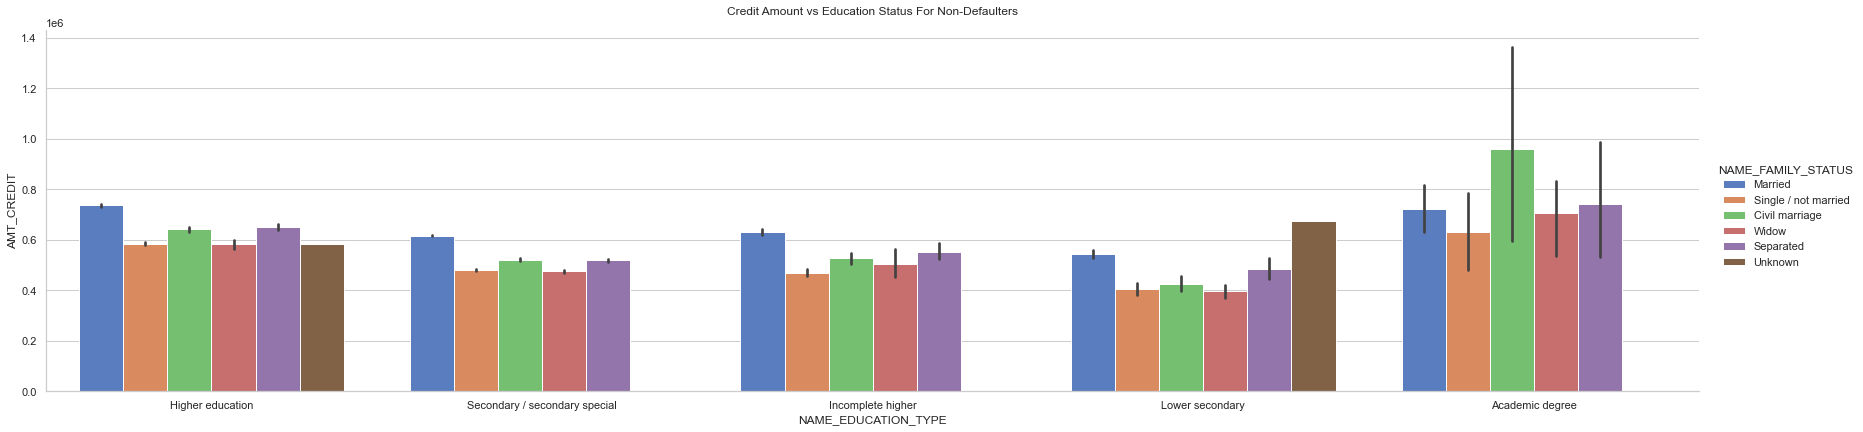

In [62]:
#ploting NAME_EDUCATION_TYPE vs AMT_CREDIT for each family status for Target 0
sns.catplot(data=t0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',height=6,aspect=4, kind="bar", palette="muted")
plt.title('Credit Amount vs Education Status For Non-Defaulters')

#### Observation

From the above graph the following can be concluded:
1. Most of the loan was received for Acadmeic degree and especially Civil marriage applicants were most.
2. Lower secondary individuals borrowed the least amount and widows borrowed the least among them.

Text(0.5, 1.0, 'Credit Amount vs Education Status for Defaulters')

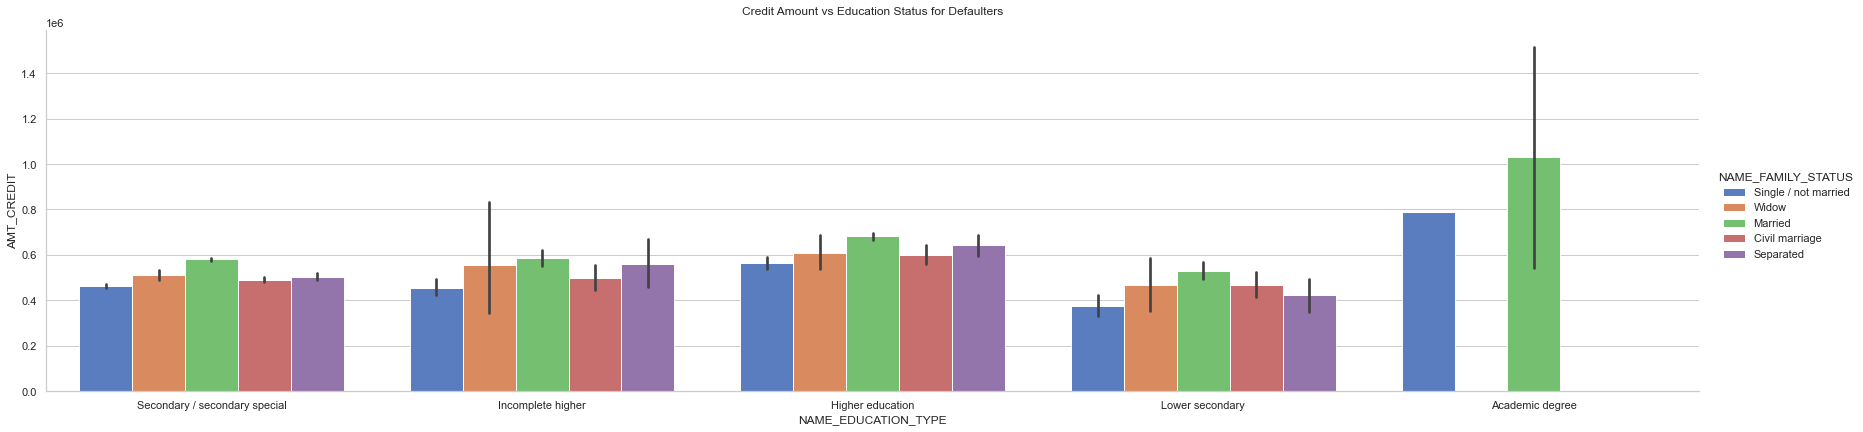

In [63]:
#ploting NAME_EDUCATION_TYPE vs AMT_CREDIT for each family status for target 1
sns.catplot(data =t1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',height=6,aspect=4, kind="bar", palette="muted")
plt.title('Credit Amount vs Education Status for Defaulters')

#### Observation

From the above graph the following can be concluded:
1. Applicants with lower secondary education borrowed the least.
2. In Lower secondary individuals widows borrowed the least and married defaulted the most.

### Previous_application

In [64]:
#read previous application data to the dataframe
inp1=pd.read_csv("previous_application.csv")

In [65]:
#display first 5 data
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
#display info of the dataframe
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [67]:
#display datatypes of columns
inp1.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [68]:
# Cleaning the missing data
# listing the null values columns having more than 50%
empty_col=inp1.isnull().sum()
empty_col=empty_col[empty_col.values>(0.5*len(empty_col))]
len(empty_col)

15

In [69]:
#Removing those 15 columns

empty_col = list(empty_col[empty_col.values>=0.5].index)
inp1.drop(labels=empty_col,axis=1,inplace=True)
inp1.shape

(1670214, 22)

In [70]:
#Removing the column values of 'XNA' and 'XAP'
inp1=inp1.drop(inp1[inp1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
inp1=inp1.drop(inp1[inp1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)
inp1.shape

(69635, 22)

In [71]:
#Merging the Application dataset with previous appliaction dataset
merged_data=pd.merge(left=inp0,right=inp1,how='inner',on='SK_ID_CURR',suffixes='_x')

In [72]:
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_APPLICATION,AMT_CREDITx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,-10341,-1010,-4799.0,-3015,1,1,0,1,0,0,Laborers,1.0,2,2,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.502779,0.535276,0.9831,0.3333,0.9831,0.3333,0.9831,0.3333,0.1227,0.0,0.0,0.0,0.0,-599.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,75000-100000,150000-200000,1390369,Cash loans,94500.0,109971.0,FRIDAY,11,Y,1,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,-5266.0,-3787,1,1,0,1,0,1,Unknown,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.410103,0.9697,0.0417,0.9697,0.0417,0.9697,0.0417,0.0117,0.0,0.0,0.0,0.0,-1634.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0,275000-300000,650000-700000,1344613,Cash loans,1260000.0,1260000.0,WEDNESDAY,14,Y,1,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-11694,-2060,-3557.0,-3557,1,1,0,1,0,0,Drivers,3.0,2,2,THURSDAY,10,0,0,0,1,1,0,Self-employed,0.321745,0.411849,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,2.0,0.0,2.0,0.0,-697.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,350000-375000,700000-750000,1077565,Cash loans,1350000.0,1487214.0,MONDAY,14,Y,1,Buying a used car,Approved,-695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,-8236.0,-4292,1,1,0,1,0,0,Managers,2.0,2,2,TUESDAY,8,0,0,0,0,0,0

In [73]:
# Renaming the column names after merging for readability

merged_data = merged_data.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [74]:
# Removing unwanted columns for analysis
merged_data.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [75]:
#check shape of the Merged Data
merged_data.shape

(59413, 90)

### Univariate analysis

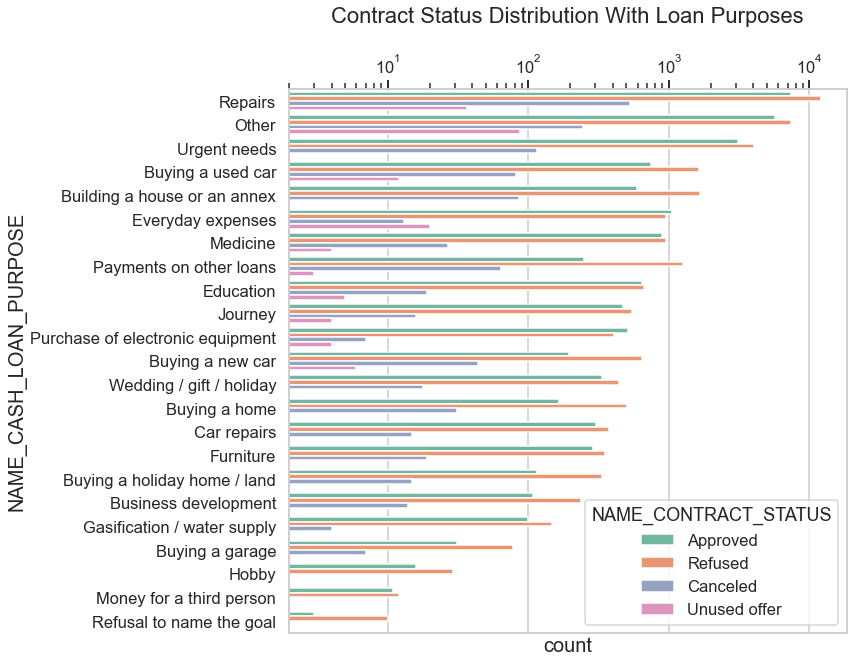

In [76]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(10,10))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.title('Contract Status Distribution With Loan Purposes')
plt.xscale('log')

ax = sns.countplot(data = merged_data, y= 'NAME_CASH_LOAN_PURPOSE',orient="h",
                   order= merged_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue= 'NAME_CONTRACT_STATUS',palette='Set2') 
ax.xaxis.tick_top()

#### Observation
1. Loan refusals are more for Repairs purposes.
2. Equal number of approvals and refusals for Education, Medicine and Everyday expenses 

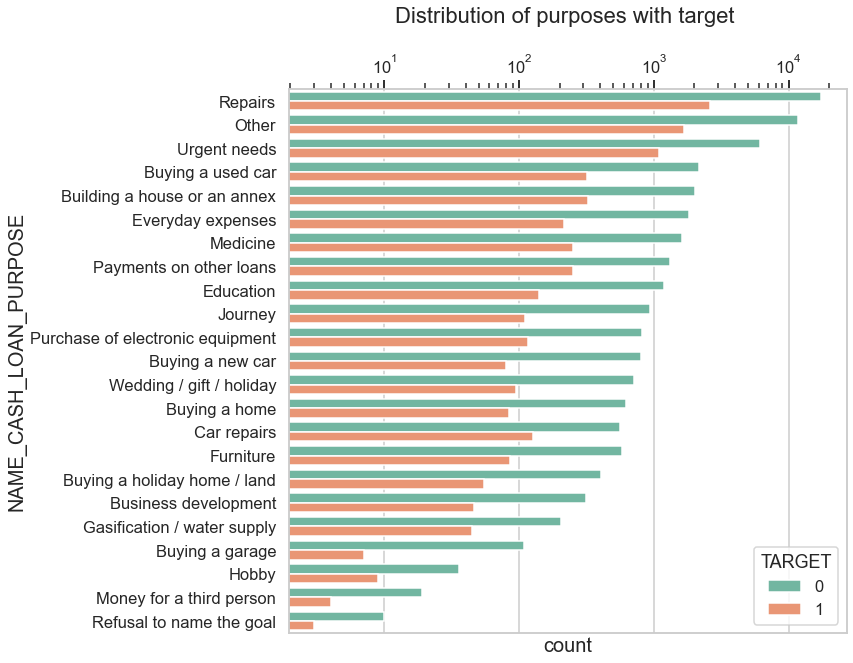

In [77]:
#Distribution of purposes with target

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(10,10))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = merged_data, y= 'NAME_CASH_LOAN_PURPOSE',orient="h",
                   order=merged_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue= 'TARGET',palette='Set2') 
ax.xaxis.tick_top()

#### Observation

Loans on Repairs are defaulted the most